In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
def rk4(f,x,t,dt,p):
    """
    Calcula un paso de integración del método de Runge Kutta orden 4.
    
    Argumentos de entrada:
    
        f : R^n -> R^n
        x = x(t) : R^n
        t = tiempo : R
        dt = paso de tiempo : R
        p = parametros : R^q        
        
    Retorna aproximacion numérica de
    
        x(t+dt) : R^n

    # Ejemplos:
    """    
    k1 = f(x,t,p)
    k2 = f(x+0.5*dt*k1,t+0.5*dt,p)
    k3 = f(x+0.5*dt*k2,t+0.5*dt,p)
    k4 = f(x+dt*k3,t+dt,p)
    return x+dt*(k1+2.0*k2+2.0*k3+k4)/6.0

In [3]:
def integrador_ode_trigger(m, f, x0, a, b, k, p, v_um):
    """
    Integra numéricamente la ODE
    
        dx/dt = f(x,t)
        
    sobre el intervalo t:[a,b] usando k pasos de integración y el método m, bajo condicion inicial x(a)=x0.
    No es necesario que a<b.
    
    Argumentos de entrada:
    
        m = metodo de integracion (ej. euler, rk2, etc.)
        f : R^n -> R^n
        x0 = condicion inicial : R
        a = tiempo inicial : R
        b = tiempo final : R
        k = num. pasos de integracion : N
        p = parametros : R^q        
    
    Retorna:
    
        t : R^{k+1} , t_j = a+j*dt para j=0,1,...,k
        x : R^{k+1,n} , x_ij = x_i(t_j) para i=0,1,...,n-1 y j=0,1,...,k
        
    donde a+k*dt = b.
    """  
    assert k>0
    n = len(x0)
    dt = (b-a)/k
    x = np.zeros((n,k+1))
    t = np.zeros(k+1)
    x[:,0] = x0
    t[0] = a
    for j in range(k):
        t[j+1] = t[j] + dt
        fn = m(f,x[:,j],t[j],dt,p)
        if fn[0] > v_um:
            x[0,j+1] = p[2]
            x[1,j+1] = x[1,j] + p[3]
        else:
            x[:,j+1] = fn

    return t,x

In [4]:
def model_iz(z, t, params):
    a, b, c, d, i = params
    v, u = z
#    if v >= 30E-3:
#        v = c
#        u = u + d
    dvdt = 0.04 * v**2 + 5 * v + 140 - u + i(t)
    dudt = a * (b * v - u)
    return np.array([dvdt, dudt])

In [5]:
neurons = {}
current = {}

### RS

In [6]:
def i_iz(t):
    if t < 10:
        i = 0
    else:
        i = 10
    return i            

$$ 0=0.04\cdot v^2+5\cdot v+140-u+I $$
$$ 0=a(bv-u) $$
$$ \Rightarrow bv = u $$
para $I=0$, $b=0.2$:

$$ 0=0.04\cdot v^2 + 5 \cdot v +140 - 0.2 \cdot v $$
$$ =0.04\cdot v^2 + 4.8\cdot v +140 $$

$$ v_1 = -50 $$
$$ v_2 = -70 $$

$$ u = bv $$
$$ \Rightarrow u = -70 \cdot 0.2 $$
$$ u=-14 $$

In [7]:
a, b, c, d = 0.02, 0.2, -65, 8
p = (a, b, c, d)
#z0 = np.array([-87, -21.75])
#z0 = np.array([-63, -15.75])
z0 = np.array([-70, -14])

In [8]:
#z = odeint(model_iz, z0, t, args=(p, i_iz))
neurons['rs'] = integrador_ode_trigger(rk4, model_iz, z0, 0, 200, int(1/0.00001), (*p, i_iz), 30)
f_curr = np.vectorize(i_iz, otypes=[float])
current['rs'] = f_curr(neurons['rs'][0])

### IB

In [9]:
def i_iz(t):
    if t < 10:
        i = 0
    else:
        i = 10
    return i  

In [10]:
a, b, c, d = 0.02, 0.2, -55, 4
p = (a, b, c, d)
#z0 = np.array([-87, -21.75])
#z0 = np.array([-63, -15.75])
z0 = np.array([-70, -14])

In [11]:
#z = odeint(model_iz, z0, t, args=(p, i_iz))
neurons['ib'] = integrador_ode_trigger(rk4, model_iz, z0, 0, 200, int(1/0.00001), (*p, i_iz), 30)
f_curr = np.vectorize(i_iz, otypes=[float])
current['ib'] = f_curr(neurons['rs'][0])

### CH

In [12]:
def i_iz(t):
    if t < 10:
        i = 0
    else:
        i = 10
    return i  

In [13]:
a, b, c, d = 0.02, 0.2, -50, 2
p = (a, b, c, d)
#z0 = np.array([-87, -21.75])
#z0 = np.array([-63, -15.75])
z0 = np.array([-70, -14])

In [14]:
#z = odeint(model_iz, z0, t, args=(p, i_iz))
neurons['ch'] = integrador_ode_trigger(rk4, model_iz, z0, 0, 200, int(1/0.00001), (*p, i_iz), 30)
f_curr = np.vectorize(i_iz, otypes=[float])
current['ch'] = f_curr(neurons['rs'][0])

### FS

In [15]:
def i_iz(t):
    if t < 10:
        i = 0
    else:
        i = 10
    return i  

In [16]:
a, b, c, d = 0.1, 0.2, -65, 2
p = (a, b, c, d)
#z0 = np.array([-87, -21.75])
#z0 = np.array([-63, -15.75])
z0 = np.array([-70, -14])

In [17]:
#z = odeint(model_iz, z0, t, args=(p, i_iz))
neurons['fs'] = integrador_ode_trigger(rk4, model_iz, z0, 0, 200, int(1/0.00001), (*p, i_iz), 30)
f_curr = np.vectorize(i_iz, otypes=[float])
current['fs'] = f_curr(neurons['rs'][0])

### TC (1)

$$ 0=0.04\cdot v^2+5\cdot v+140-u+I $$
$$ 0=a(bv-u) $$
$$ \Rightarrow bv = u $$

para $v=-63mV$, $b=0.25$:

$$ 0=0.04\cdot v^2 + 5 \cdot v +140 - 0.25 \cdot v + I $$
$$ \Rightarrow I = -0.04\cdot (-63)^2 - 4.75\cdot (-63) -140 $$

$$ I = 0.49 $$

In [18]:
def i_iz(t):
    if t < 40:
        i = 0.49
        #i = -29.51
    else:
        i = 1.0
    return i            

In [19]:
a, b, c, d = 0.02, 0.25, -65, 0.05
p = (a, b, c, d)
#z0 = np.array([-63, -21.75])
z0 = np.array([-63, -15.75])
#z0 = np.array([-70, -14])

In [20]:
#z = odeint(model_iz, z0, t, args=(p, i_iz))
neurons['tc1'] = integrador_ode_trigger(rk4, model_iz, z0, 0, 200, int(1/0.00001), (*p, i_iz), 30)
f_curr = np.vectorize(i_iz, otypes=[float])
current['tc1'] = f_curr(neurons['rs'][0])

### TC (2)

$$ 0=0.04\cdot v^2+5\cdot v+140-u+I $$
$$ 0=a(bv-u) $$
$$ \Rightarrow bv = u $$

para $v=-87mV$, $b=0.25$:

$$ 0=0.04\cdot v^2 + 5 \cdot v +140 - 0.25 \cdot v + I $$
$$ \Rightarrow I = -0.04\cdot (-87)^2 - 4.75\cdot (-87) -140 $$

$$ I = -29.51 $$

In [21]:
def i_iz(t):
    if t < 40:
        i = -29.51
    else:
        i = 0.49
    return i            

In [22]:
a, b, c, d = 0.02, 0.25, -65, 0.05
p = (a, b, c, d)
z0 = np.array([-87, -21.75])
#z0 = np.array([-63, -15.75])
#z0 = np.array([-70, -14])

In [23]:
#z = odeint(model_iz, z0, t, args=(p, i_iz))
neurons['tc2'] = integrador_ode_trigger(rk4, model_iz, z0, 0, 200, int(1/0.00001), (*p, i_iz), 30)
f_curr = np.vectorize(i_iz, otypes=[float])
current['tc2'] = f_curr(neurons['rs'][0])

### RZ

$$ 0=0.04\cdot v^2+5\cdot v+140-u+I $$
$$ 0=a(bv-u) $$
$$ \Rightarrow bv = u $$
para $I=0$, $b=0.26$:

$$ 0=0.04\cdot v^2 + 5 \cdot v +140 - 0.26 \cdot v $$
$$ =0.04\cdot v^2 + 4.8\cdot v +140 $$

$$ v_1 = -56 $$
$$ v_2 = -62.5 $$

In [24]:
def i_iz(t):
    if t < 10:
        #i = 0.49
        #i = -29.51
        i = 0.0
    elif t < 105:
        i = 0.2
    elif t < 110:
        i = 1.0
    else:
        i = 0.2
    return i            

In [25]:
a, b, c, d = 0.1, 0.26, -65, 2
p = (a, b, c, d)
z0 = np.array([-62.5, -16.25])
#z0 = np.array([-63, -15.75])
#z0 = np.array([-70, -14])

In [26]:
#z = odeint(model_iz, z0, t, args=(p, i_iz))
neurons['rz'] = integrador_ode_trigger(rk4, model_iz, z0, 0, 200, int(1/0.00001), (*p, i_iz), 30)
#f_curr = np.vectorize(i_iz, otypes=[float])
f_curr = np.vectorize(i_iz)
current['rz'] = f_curr(neurons['rs'][0])

### LTS

$$ 0=0.04\cdot v^2+5\cdot v+140-u+I $$
$$ 0=a(bv-u) $$
$$ \Rightarrow bv = u $$
para $I=0$, $b=0.25$:

$$ 0=0.04\cdot v^2 + 5 \cdot v +140 - 0.25 \cdot v $$
$$ =0.04\cdot v^2 + 4.75\cdot v +140 $$

$$ v_1 = -54.34 $$
$$ v_2 = -64.41 $$

In [27]:
def i_iz(t):
    if t < 10:
        #i = 0.49
        i = 0
    else:
        i = 10
    return i            

In [28]:
a, b, c, d = 0.02, 0.25, -65, 2
p = (a, b, c, d)
z0 = np.array([-64.41, -16.1025])
#z0 = np.array([-63, -15.75])
#z0 = np.array([-70, -14])

In [29]:
#z = odeint(model_iz, z0, t, args=(p, i_iz))
neurons['lts'] = integrador_ode_trigger(rk4, model_iz, z0, 0, 200, int(1/0.00001), (*p, i_iz), 30)
f_curr = np.vectorize(i_iz, otypes=[float])
current['lts'] = f_curr(neurons['rs'][0])

### Plot

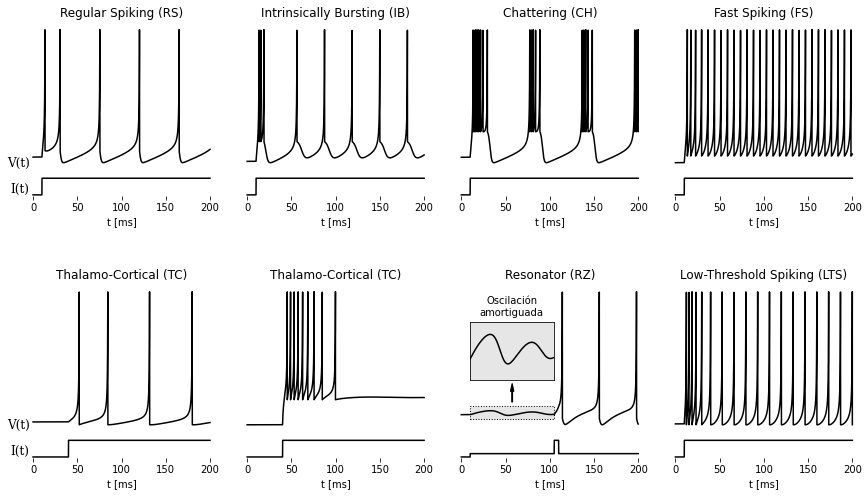

In [54]:
from matplotlib.patches import Rectangle

fig = plt.figure(figsize=(15, 8))
spec = gridspec.GridSpec(ncols=4, nrows=5,
                         wspace=0.1,
                         hspace=0.1, height_ratios=[8, 1, 4, 8, 1])
#print(spec[0])
#posicion_s = '44'
title = {
    'rs': 'Regular Spiking (RS)',
    'ib': 'Intrinsically Bursting (IB)',
    'ch': 'Chattering (CH)',
    'fs': 'Fast Spiking (FS)',
    'tc1': 'Thalamo-Cortical (TC)',
    'tc2': 'Thalamo-Cortical (TC)',
    'rz': 'Resonator (RZ)',
    'lts': 'Low-Threshold Spiking (LTS)',
}
for i, tipo in enumerate(neurons):
    posicion_n = [0, 1, 2, 3, 12, 13, 14, 15][i]
    posicion_i = [4, 5, 6, 7, 16, 17, 18, 19][i]
    fig.add_subplot(spec[posicion_n])
    plt.plot(neurons[tipo][0], neurons[tipo][1][0], 'k')
    plt.box(on=0)
    plt.xticks([]) 
    plt.yticks([]) 
    plt.title(title[tipo])
    # para el zoom en la neurona RZ --------------{{{
    if posicion_n in [14]:  
        plt.gca().add_patch(Rectangle((10, -66), 95, 10,
                ls=':',
                edgecolor = 'k',
                facecolor=(0.9,0.9,0.9,1),
                fill=True,
                lw=1))
        plt.arrow(57.5, -53, 0, 8,
                head_width = 4,
                facecolor='k',
                width = 1)
        a = plt.gca().inset_axes([0.09,0.35,0.43,0.4], facecolor=(0.9,0.9,0.9,1))
        a.plot(neurons[tipo][0], neurons[tipo][1][0], 'k')
        #a.set_box(on=0)
        a.set_title('Oscilación\namortiguada', fontsize=10)
        a.set_xticks([]) 
        a.set_yticks([]) 
        #plt.axes([0.2, 0.6, .2, .2], facecolor='y')
        a.set_xlim(10, 105)
        a.set_ylim(-65, -58)
    # --------------------------------------------}}}

    if posicion_n in [0, 12]:
        plt.ylabel('V(t)', labelpad=17, loc='bottom', family='serif', fontsize=12, rotation='horizontal')

#    plt.subplot(4, 4, posicion_i)
    fig.add_subplot(spec[posicion_i])
    plt.plot(neurons[tipo][0], current[tipo], 'k')
    plt.box(on=0)
    plt.yticks([])
    if posicion_i in [4, 16]:
        plt.ylabel('I(t)', labelpad=14, loc='bottom', family='serif', fontsize=12, rotation='horizontal')
    plt.xlabel('t [ms]')
plt.savefig("informe/figuras/models.pdf", format="pdf", bbox_inches="tight")
plt.show()